# Result Visualization Day x Hour (2-classes)

Using the training results generated by the FX_CNN_NDF_train.py and the testing results generated by FX_CNN_NDF_test.py, the following visualizes the results.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import os

Import all results for both the stand alsone CNN and the combination with the Neural Decision Forest.

In [3]:
training_loss_cv_CNN = pd.read_csv ("CNN_only/training_loss_cv.csv", sep=",", header=None)
validation_loss_cv_CNN = pd.read_csv ("CNN_only/validation_loss_cv.csv", sep=",", header=None)
accuracy_cv_CNN = pd.read_csv ("CNN_only/accuracy_cv.csv", sep=",", header=None).T
training_loss_full_CNN = pd.read_csv ("CNN_only/training_loss_full.csv", sep=",", header=None)
test_results_CNN = pd.read_csv ("CNN_only/test_results.csv", sep=",")

In [4]:
training_loss_cv_NDF = pd.read_csv ("CNN_NDF/training_loss_cv.csv", sep=",", header=None)
validation_loss_cv_NDF = pd.read_csv ("CNN_NDF/validation_loss_cv.csv", sep=",", header=None)
accuracy_cv_NDF = pd.read_csv ("CNN_NDF/accuracy_cv.csv", sep=",", header=None).T
training_loss_full_NDF = pd.read_csv ("CNN_NDF/training_loss_full.csv", sep=",", header=None)
test_results_NDF = pd.read_csv ("CNN_NDF/test_results.csv", sep=",")

**Training and Validation Loss**

In order to train the model parameters, the selected model is trained on a trainingset over a preset number of epochs using a loss function and an optimizer. In order to track this process, the training loss, which indicates the classification accuracy in the training set after each epoch is plotted together with the validation loss, which indicates the classification accuracy for the validation set given the parameters derived from training after each epoch.  In order to find an appropriate number of training epochs, the divergence between the training loss and validation loss after each epoch is considered. Ideally, the training loss convergeces towards zero, while the validation loss decreases or remains flat. This would indicate that the model is not overfitting the training set data, such that the parameters are appropriate to be applied to the validation set. The number of epoch should be set such that that a significant increase of the validation loss is avoided.

5 fold Cross Validation is used as a base to conculde an appropriate number of epochs by splitting the trainingset into five different subsets. Making use of CV allows for a more robust selection of the number of epochs as the risk of selecting a inappropriate number based on an unrepresentative training and validation set is mitgated.

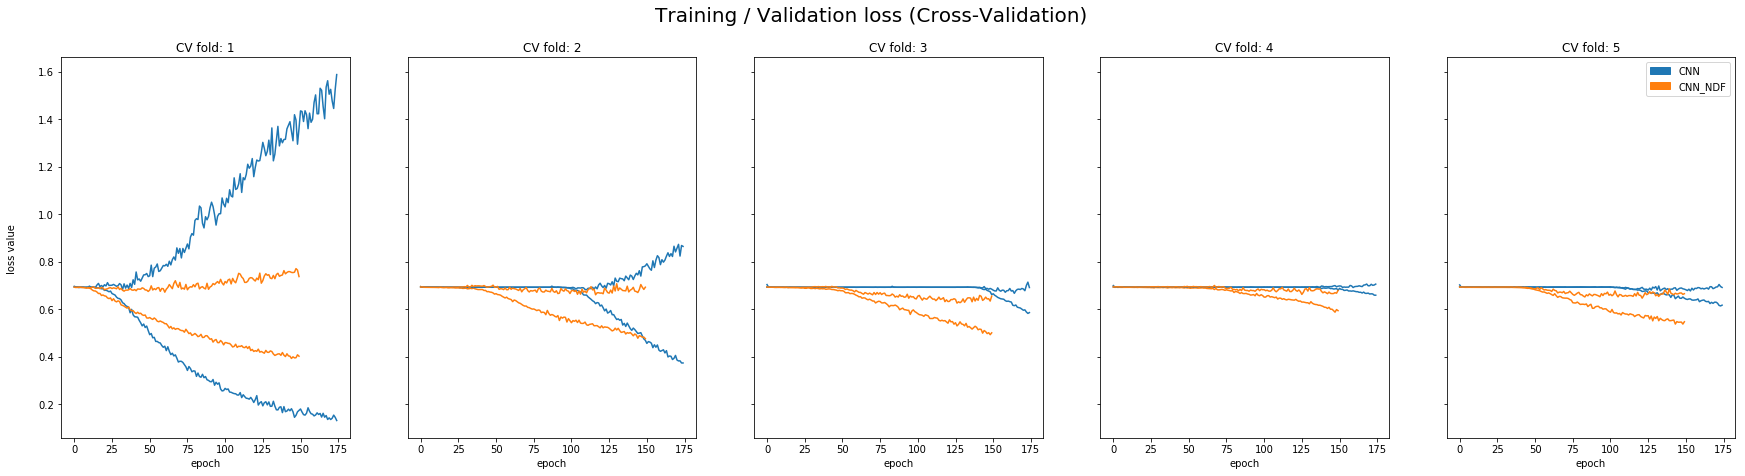

In [8]:
fig, axes = plt.subplots (1, int (training_loss_cv_CNN.shape[0]), figsize=(30,7), sharey=True)
fig.text (0.1, 0.5, 'loss value', va='center', rotation='vertical')

fig.suptitle ("Training / Validation loss (Cross-Validation)", fontsize=20)
cnn_only = mpatches.Patch (color='C0', label='CNN')
cnn_ndf = mpatches.Patch (color='C1', label='CNN_NDF')
plt.legend (handles=[cnn_only,cnn_ndf])
folds = training_loss_cv_CNN.shape[0]
epochs_cnn = range (training_loss_cv_CNN.shape[1])
epochs_ndf = range (training_loss_cv_NDF.shape[1])
for i in range (folds):
    axes[i].plot (epochs_cnn, training_loss_cv_CNN.loc[i, :], "-", color="C0")
    axes[i].plot (epochs_ndf, training_loss_cv_NDF.loc[i, :], "-", color="C1")
    axes[i].plot (epochs_cnn, validation_loss_cv_CNN.loc[i, :], "-", color="C0")
    axes[i].plot (epochs_ndf, validation_loss_cv_NDF.loc[i, :], "-", color="C1")
    axes[i].set_title("CV fold: %i" %(i+1))
    axes[i].set_xlabel ("epoch")
plt.show ()

**Accuracy**

The accuracy is the sum of True Positives and True Negatives divided by all results. The mean of the accuracy in each validation set derived after the final epoch training in CV is a good indicator for where the accuarcy in the testset should lie. Therefrore the mean of the accuracy in each validation set from CV is plotted together with the standard deviation to signial a potential disprecpancy between the Cross Validation mean accuracy and the testset accuracy.

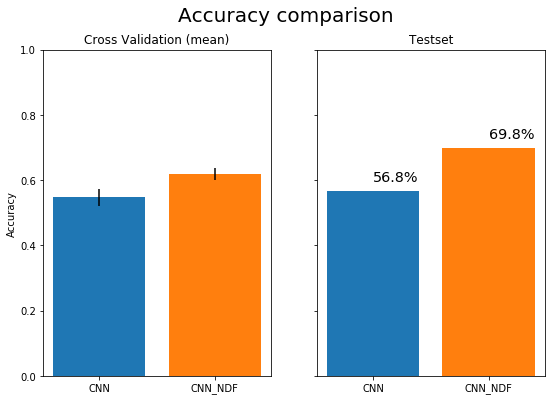

In [13]:
std_acc_CNN = np.std (accuracy_cv_CNN)
std_acc_NDF = np.std (accuracy_cv_NDF)

fig, axes = plt.subplots (1, 2, sharey=True, sharex=True, figsize=(9,6))
fig.text (0.07, 0.5, 'Accuracy', va='center', rotation='vertical')
fig.suptitle("Accuracy comparison", fontsize=20)
axes[0].set_ylim (0, 1)
axes[0].set_title ('Cross Validation (mean)')
axes[0].bar ("CNN", accuracy_cv_CNN.mean (), yerr=std_acc_CNN)
axes[0].bar ("CNN_NDF", accuracy_cv_NDF.mean (), yerr=std_acc_NDF)
axes[1].set_title ('Testset')
axes[1].bar ("CNN", test_results_CNN["accuracy"])
axes[1].text ("CNN",test_results_CNN["accuracy"]+0.03, str(round(test_results_CNN["accuracy"][0]*100,1)) +"%", fontsize='x-large')
axes[1].bar ("CNN_NDF", test_results_NDF["accuracy"])
axes[1].text ("CNN_NDF", test_results_NDF["accuracy"] + 0.03, str(round(test_results_NDF["accuracy"][0]*100,1)) +"%", fontsize='x-large')
plt.show ()

**Training Loss on full trainingset**

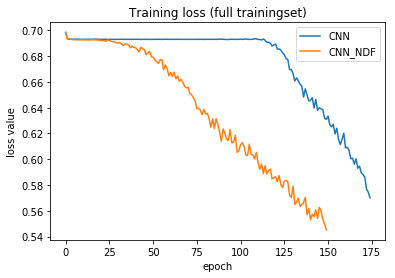

In [14]:
plt.title("Training loss (full trainingset)")
plt.plot (epochs_cnn, training_loss_full_CNN.loc[0, :], label="CNN")
plt.plot (epochs_ndf, training_loss_full_NDF.loc[0, :], label="CNN_NDF")
plt.xlabel("epoch")
plt.ylabel('loss value')
plt.legend()
plt.show ()